# TWD - Praca domowa 8
 Marcel Witas
 
 Dane: [Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

## Wstęp
Niniejszy raport jest prezentacją wyników wstępnej eksploracyjnej analizy danych, wykonanej w ramach pracy domowej nr 8 z przedmiotu Techniki Wizualizacji Danych. Dane dotyczą czerwonych wariantów Portugalskiego "Vinho Verde". 

Źródło danych: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Wszystkie kolumny zawierają dane numeryczne, z różnych przyczyn nie ma niestety danych o cenie czy typie winogron. Ramka nie ma braków danych, jest 1599 obserwacji. 

## Kolumny:
* _fixed acidity_  - kwasowość ogólna
* _volatile acidity_  - kwasowość lotna
* _citric acid_  - występujący w niewielkich ilościach kwas cytrynowy może dodać winom „świeżości” i smaku         
* _residual sugar_  - ilość cukru pozostała po zatrzymaniu fermentacji, rzadko można znaleźć wina o zawartości poniżej 1 grama na litr, a wina o zawartości powyżej 45 gramów na litr są uważane za słodkie     
* _chlorides_  - ilość soli    
* _free sulfur dioxide_  - wolna forma SO2 istnieje w równowadze między cząsteczkowym SO2 (jako rozpuszczony gaz) a jonem wodorosiarczynowym; zapobiega rozwojowi drobnoustrojów i utlenianiu wina
* _total sulfur dioxide_  - ilość wolnych i związanych form S02; w niskich stężeniach SO2 jest w większości niewykrywalny w winie, ale przy stężeniu wolnego SO2 powyżej 50 ppm, SO2 staje się widoczne w nosie i smaku wina
* _density_  - gęstość, zbliżona do gęstości wody w zależności od procentowej zawartości alkoholu i cukru    
* _pH_ - gęstość wody jest zbliżona do gęstości wody w zależności od procentowej zawartości alkoholu i cukru opisuje kwasowość lub zasadowość wina w skali od 0 (bardzo kwaśne) do 14 (bardzo zasadowe); większość win ma od 3 do 4 w skali pH                   
* _sulphates_ - zawartość siarczanów, które mogą przyczynić się do zwiększenia poziomu dwutlenku siarki (S02), który działa jako środek przeciwdrobnoustrojowy i przeciwutleniacz
* _alcohol_  - zawartość alkoholu (w %)           
* _quality_ - ocena jakości od 0 do 10; w analizowanych danych minimalna ocena to 3, a maksymalna 8

## Rozkłady zmiennych

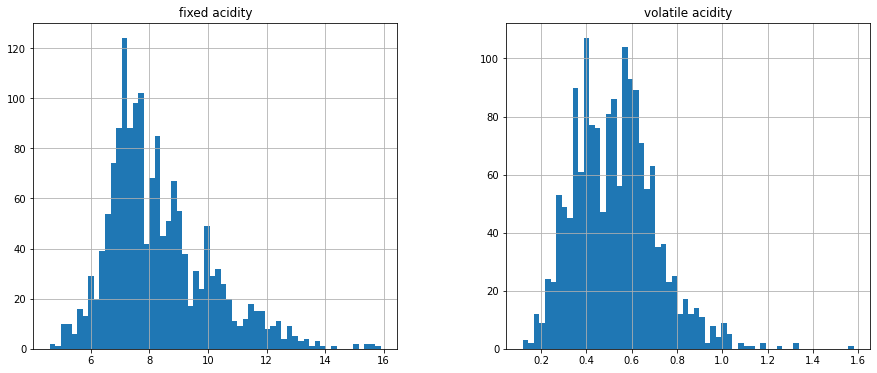

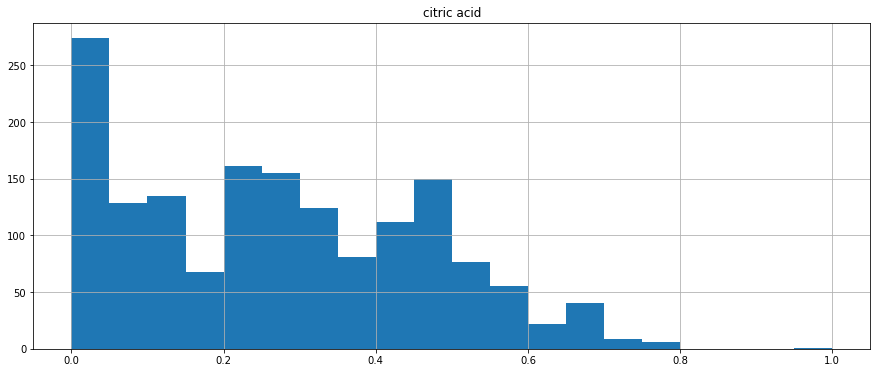

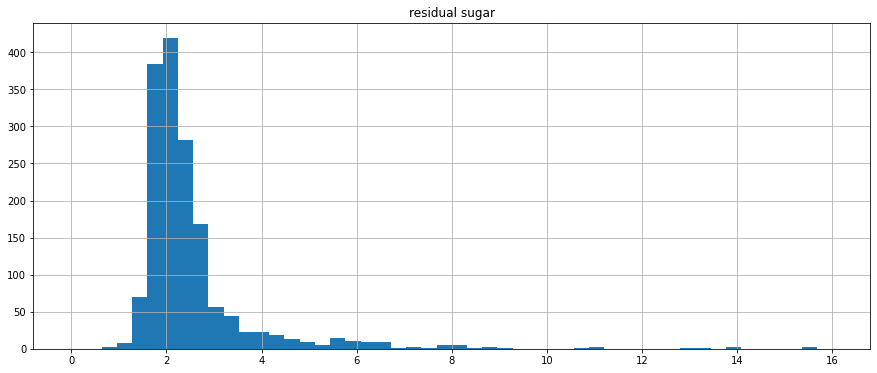

In [55]:
df[['fixed acidity', 'volatile acidity']].hist(figsize=(15,6), bins=60)
df[['citric acid']].hist(figsize=(15,6), bins=20)
df[['residual sugar']].hist(figsize=(15,6), bins=50, range=(0,16))

plt.show()

Widzimy, że zdecydowana większość win ma 1-3g cukrów na litr, ale zdażają się również mające ponad 15. Zatem nie są to wina słodkie.

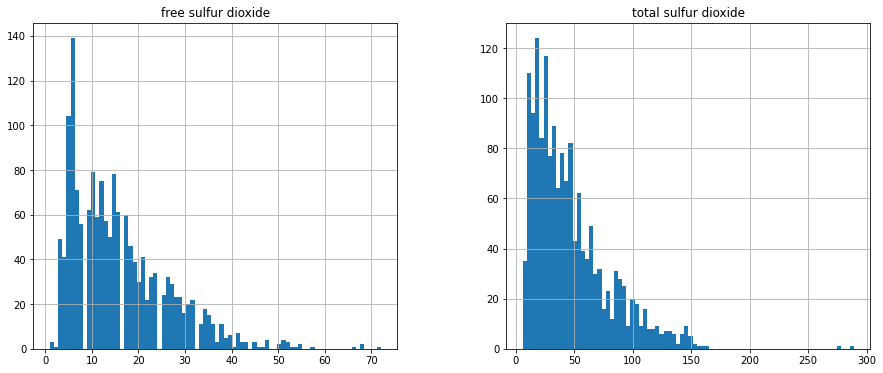

In [52]:
df[['free sulfur dioxide', 'total sulfur dioxide']].hist(figsize=(15,6), bins=80)
plt.show()

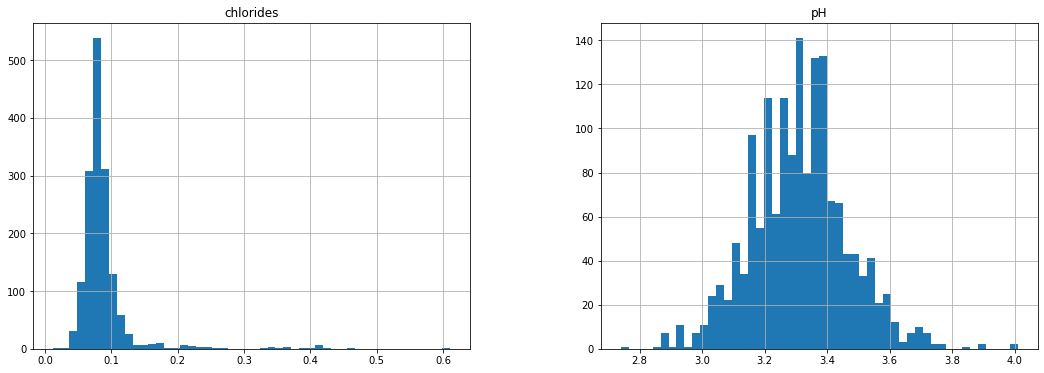

In [9]:
df[['chlorides', 'pH']].hist(figsize=(18,6), bins=50)
plt.show()

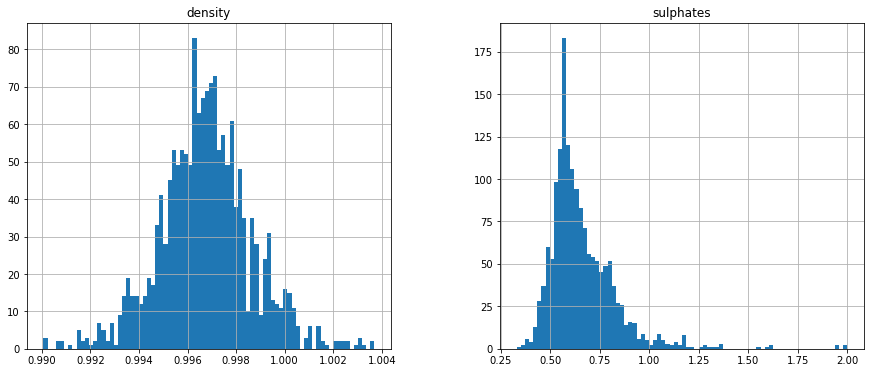

In [48]:
df[['density', 'sulphates']].hist(figsize=(15,6), bins=80)
plt.show()

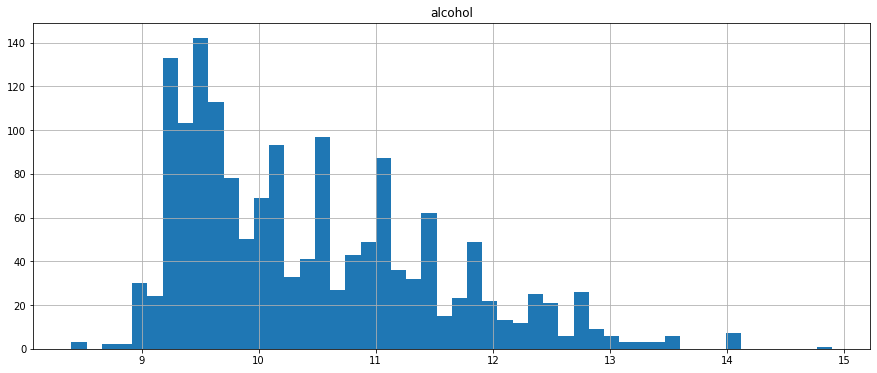

In [50]:
df[['alcohol']].hist(figsize=(15,6), bins=50)
plt.show()

Większość wina zawiera 9-11% alkoholu.

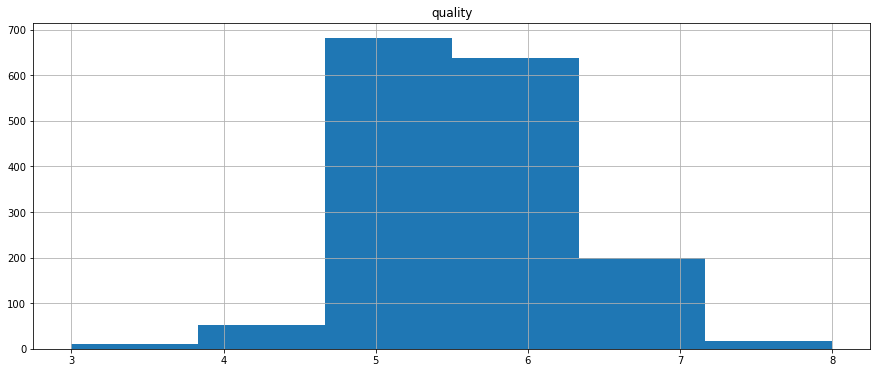

In [9]:
df[['quality']].hist(figsize=(15,6), bins=6)

plt.show()

Większość win jest oceniona na 5 lub 6.

# Jak skorelowane ze sobą są zmienne?

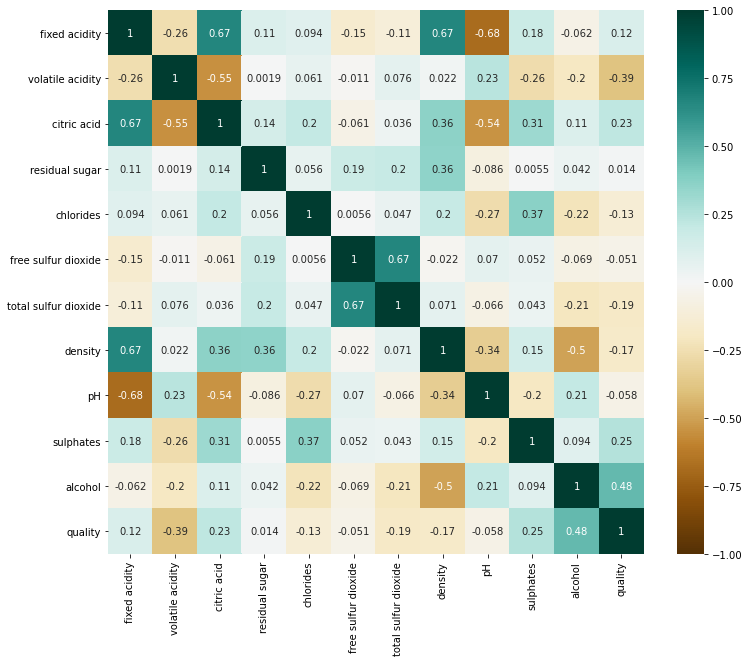

In [20]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

## Co wpływa na jakość wina?
Aby ułatwić sprawdzenie tego, jakie cechy mają dobre wina tworzymy nową kolumnę w ramce, w której uznajemy, że wina z oceną wyższą niż 5 są dobre.


In [12]:
wines_df = df.assign(is_good = df.quality > 5)

Otrzymujemy podobną liczbę win lepszych i gorszych.

In [13]:
d1 = wines_df.groupby(['is_good']).size().reset_index()
d1

,is_good,0
0,False,744
1,True,855


### Alkohol

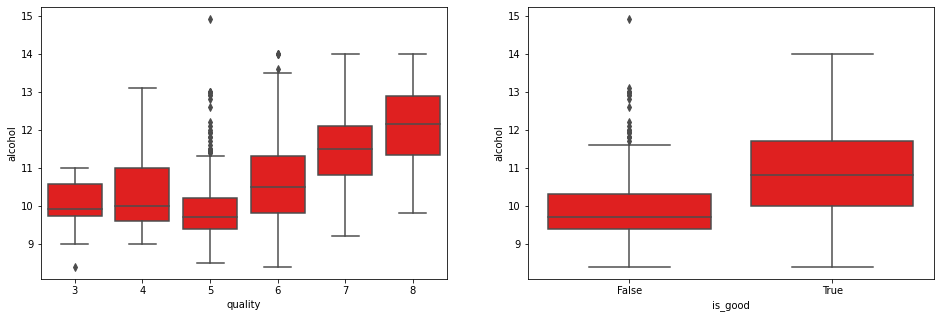

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(data=df, x='quality', y='alcohol', color = 'r', ax=axs[0])
sns.boxplot(data=wines_df, x='is_good', y='alcohol', color = 'r', ax=axs[1])
plt.show()

Z wykresów pudełkowych można zaobserwować, że lepsze wina zawierają najczęściej więcej alkoholu niż słabsze.
### Siarczany 
Zawartość siarczanów również jest wyższa wśród win lepszej jakości.

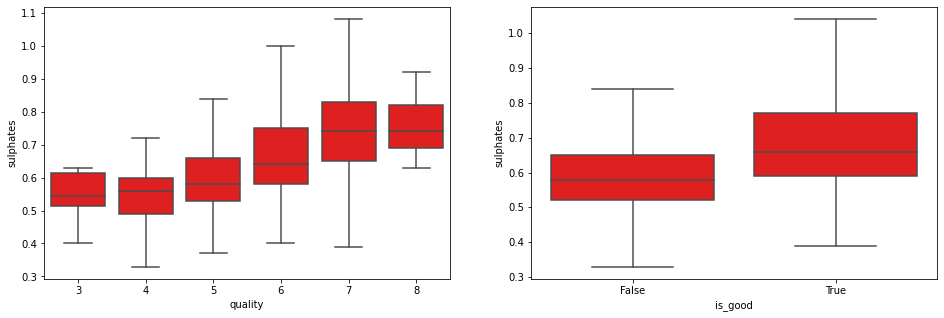

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(data=df, x='quality', y='sulphates', color = 'r', showfliers = False,ax=axs[0])
sns.boxplot(data=wines_df, x='is_good', y='sulphates', color = 'r', showfliers = False,ax=axs[1])
plt.show()

### Kwas cytrynowy

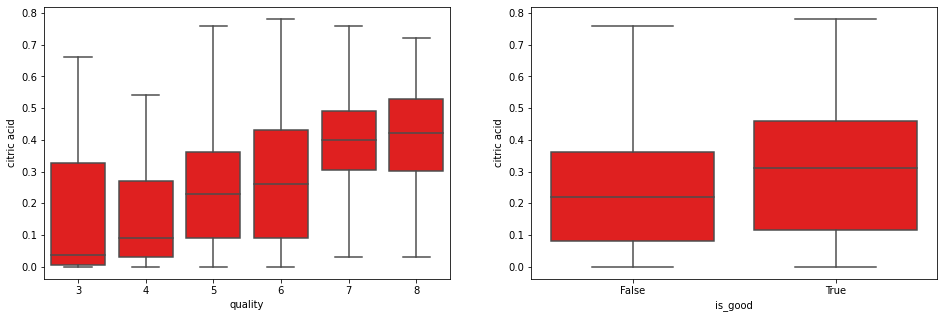

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(data=df, x='quality', y='citric acid', color = 'r', showfliers = False,ax=axs[0])
sns.boxplot(data=wines_df, x='is_good', y='citric acid', color = 'r', showfliers = False,ax=axs[1])
plt.show()

W tym przypadku największą różnicę widać pomiędzy winami ocenionymi na 7 i 8, a pozostałymi.

### Kwasy lotne

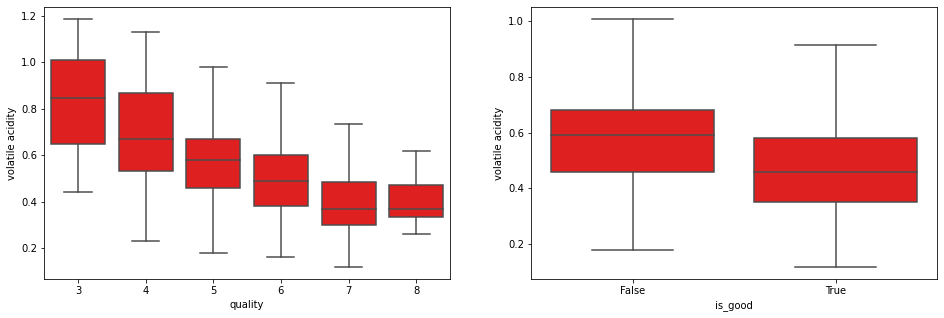

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(data=df, x='quality', y='volatile acidity', color = 'r', showfliers = False,ax=axs[0])
sns.boxplot(data=wines_df, x='is_good', y='volatile acidity', color = 'r', showfliers = False,ax=axs[1])
plt.show()

Gorzej ocenione wina mają zdecydownie wyższą zawartość kwasów lotnych.

Pozostałe parametry nie mają bezpośredniego wpływu na jakość wina, np. :

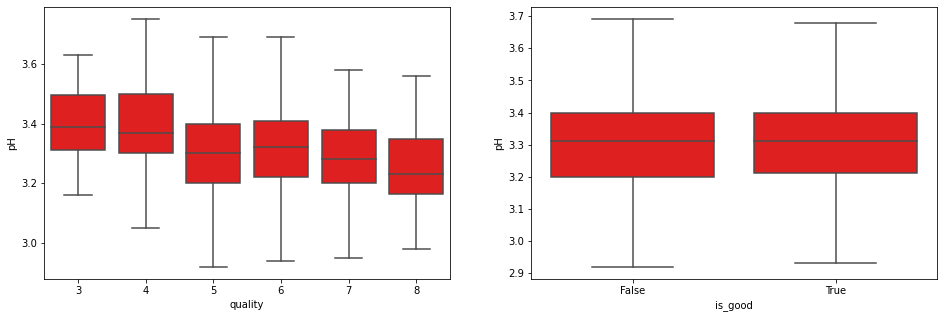

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(data=df, x='quality', y='pH', color = 'r', showfliers = False,ax=axs[0])
sns.boxplot(data=wines_df, x='is_good', y='pH', color = 'r', showfliers = False,ax=axs[1])
plt.show()

Widoczna jest różnica pomiędzy ocenami 7/8 a 3/4, ale wina ocenione na 5 i 6 mają zbliżone pH.

## Podsumowanie

Lepiej ocenione wina miały zazwyczaj wyższą zawartość alkoholu, kwasu cytrynowego oraz siarczanów. Zawartość kwasów lotnych była wyższa wśród gorzej ocenionych win. Wśród pozostałych parametrów trudno było zauważyć znaczący wpływ na jakość wina.
Nie oznacza to oczywiście, że są to jedyne czynniki, a ich wysokie/niskie wartości wcale nie muszą świadczyć o wysokiej/niskiej jakości win. 